In [12]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import matplotlib.pylab as plt

pd.set_option('precision', 4)

In [13]:
Matching = pd.read_excel('DATA/19.09.23 список образцов Моча.xlsx', header=2)

In [14]:
Matching.columns.values[4] = u'Форма банки'

In [15]:
print Matching.columns
## u'Unnamed: 4' -- это Форма банки


Index([u'Порядковый номер', u'Значение BAR-CODE', u'номера спектров', u'ФИО',
       u'Форма банки', u'Пол', u'Возраст', u'Цвет', u'Плотность',
       u'Плотность.1', u'pH', u'pH.1', u'Белок', u'Белок.1', u'Билирубин',
       u'Билирубин.1', u'Глюкоза', u'Глюкоза.1', u'Кетоны', u'Кетоны.1',
       u'Лейкоциты', u'Лейкоциты.1', u'Нитриты', u'Нитриты.1', u'Уробилиноген',
       u'Уробилиноген.1', u'Кровь', u'Кровь.1', u'Эритроциты', u'Эритроциты.1',
       u'Эритроциты.2', u'Лейкоциты.2', u'Лейкоциты.3',
       u'Клетки плоского эпителия', u'Клетки плоского эпителия.1',
       u'Цилиндры гиалиновые', u'Цилиндры гиалиновые.1', u'Бактерии',
       u'Бактерии.1', u'Кристаллы', u'Кристаллы.1', u'Дрожжи', u'Дрожжи.1',
       u'Малые клетки', u'Малые клетки.1', u'Цилиндры патологические',
       u'Цилиндры патологические.1', u'Слизь', u'Слизь.1', u'Сперматозоиды',
       u'Сперматозоиды.1', u'TOTAL'],
      dtype='object')


In [8]:
Matching[u'Порядковый номер'].values

array([u'Chm1', u'Chm2', u'Chm3', u'Chm4', u'Chm5', u'Chm6', u'Chm7',
       u'Chm8', u'Chm9', u'Chm10', u'Chm11', u'Chm12', u'Chm13', u'Chm14',
       u'Chm16', u'Chm17', u'Chm18', u'Chm19', u'Chm20', u'Chm21',
       u'Chm22', u'Chm23', u'Chm24', u'Chm25', u'Chm26', u'Chm27',
       u'Chm28', u'Chm29', u'Chm30', u'Chm31', u'Chm32', u'Chm33',
       u'Chm34', u'Chm35', u'Chm36', u'Chm37', u'Chm38', u'Chm39',
       u'Chm40', u'Chm41', u'Chm42', u'Chm43', u'Chm44', u'Chm45',
       u'Chm46', u'Chm47', u'Chm48', u'Chm49', u'Chm50', u'Chm51',
       u'Chm52', u'Chm53', u'Chm54', u'Chm55', u'Chm56', u'Chm57',
       u'Chm58', u'Chm59', u'Chm60', u'Chm61', u'Chm62', u'Chm63',
       u'Chm64', u'Chm65', u'Chm66', u'Chm67', u'Chm68', u'Chm69',
       u'Chm70', u'Chm71', u'Chm72', u'Chm73', u'Chm74', u'Chm75',
       u'Chm76', u'Chm77', u'Chm78', u'Chm79', u'Chm80', u'Chm81',
       u'Chm82', u'Chm83', u'Chm84', u'Chm85', u'Chm86', u'Chm87',
       u'Chm88', u'Chm89', u'Chm90', u'Chm91', u'Ch

In [9]:
In_Data = pd.concat([pd.read_csv('DATA/26.09.19.csv'),
                    pd.read_csv('DATA/27.09.19.csv'),
                    pd.read_csv('DATA/01.10.19.csv')], axis=0)
In_Data['Dataset'] = In_Data.Dataset.apply(unicode)

In [10]:
mms = MinMaxScaler()
Data = pd.DataFrame(mms.fit_transform(In_Data.filter(regex='^Ch').T).T,
                    columns=In_Data.filter(regex='^Ch').columns)



In [11]:
N_Components = 6

pca_model = PCA(n_components=N_Components)
PCA_Data = pd.DataFrame(pca_model.fit_transform(Data))
PCA_Data['Dataset'] = In_Data.Dataset.values

In [12]:
PCA_Data

,0,1,2,3,4,5,Dataset
0,0.1989,-0.0807,-0.0276,-0.0367,2.2460e-02,0.0059,Chm1
1,0.2432,-0.0462,-0.0541,-0.0246,1.4551e-02,0.0105,Chm1
2,0.1864,-0.0635,-0.0336,-0.0339,1.0635e-03,0.0163,Chm1
3,0.2208,-0.0453,-0.0402,-0.0349,8.6308e-03,0.0092,Chm1
4,0.1761,-0.0692,-0.0271,-0.0386,3.4862e-04,0.0174,Chm1
5,0.1941,-0.0787,-0.0219,-0.0379,4.2495e-03,0.0095,Chm1
6,0.2056,-0.0663,-0.0356,-0.0292,1.8307e-02,0.0129,Chm1
7,0.1811,-0.0502,-0.0452,-0.0160,-4.6808e-03,0.0171,Chm1
8,0.2031,-0.0752,-0.0343,-0.0345,1.0051e-02,0.0129,Chm1
9,0.2102,-0.0696,-0.0364,-0.0386,1.0475e-02,0.0076,Chm1


https://plot.ly/~ypoymanov/44/#/

У chm25 есть странный выброс

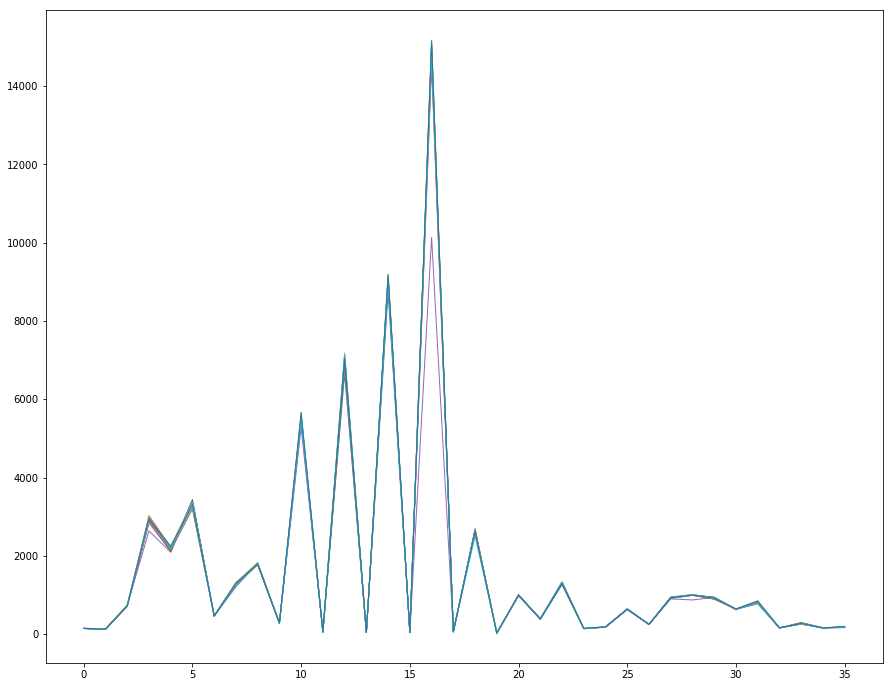

In [13]:
plt.figure(figsize=(15,12))
for spec in In_Data[In_Data.Dataset == 'Chm25'].filter(regex='^Ch').values:
    plt.plot(range(len(spec)), spec, linewidth=1)

In [14]:
Matching#.head(15)

,Порядковый номер,Значение BAR-CODE,номера спектров,ФИО,Форма банки,Пол,Возраст,Цвет,Плотность,Плотность.1,...,Дрожжи.1,Малые клетки,Малые клетки.1,Цилиндры патологические,Цилиндры патологические.1,Слизь,Слизь.1,Сперматозоиды,Сперматозоиды.1,TOTAL
0,Chm1,1.0178e+07,NaN,NaN,NaN,m,24.0,COLORLESS,1.006,1.0,...,0.0,0.2,0.0,1.29,1.0,0.0,0.0,0.0,0.0,8.0
1,Chm2,1.0153e+07,NaN,NaN,NaN,f,62.0,YELLOW,1.028,0.0,...,0.0,6.3,1.0,3.11,1.0,42.0,1.0,0.0,0.0,12.0
2,Chm3,1.0153e+07,NaN,NaN,NaN,f,71.0,YELLOW,1.009,1.0,...,0.0,2.9,0.0,0.12,0.0,0.4,0.0,0.0,0.0,3.0
3,Chm4,1.0162e+07,NaN,NaN,NaN,f,57.0,YELLOW,1.018,0.0,...,0.0,2.7,0.0,0.64,0.0,0.1,0.0,0.0,0.0,4.0
4,Chm5,1.0164e+07,NaN,NaN,NaN,m,77.0,LIGHT YELLOW,1.029,1.0,...,0.0,1.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0
5,Chm6,1.0162e+07,NaN,NaN,NaN,m,82.0,COLORLESS,1.003,1.0,...,0.0,0.0,0.0,0.30,0.0,0.0,0.0,0.0,0.0,1.0
6,Chm7,1.0164e+07,NaN,NaN,NaN,m,64.0,LIGHT YELLOW,1.016,0.0,...,0.0,1.9,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0
7,Chm8,1.0162e+07,NaN,NaN,нестандарт,m,82.0,LIGHT YELLOW,1.034,1.0,...,0.0,1.6,0.0,0.00,0.0,0.1,0.0,0.0,0.0,0.0
8,Chm9,1.0164e+07,NaN,NaN,NaN,m,58.0,LIGHT YELLOW,1.009,1.0,...,0.0,1.0,0.0,0.00,0.0,0.1,0.0,0.0,0.0,1.0
9,Chm10,1.0164e+07,NaN,NaN,NaN,m,77.0,COLORLESS,1.009,1.0,...,0.0,0.6,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
Matching.columns

Index([u'Порядковый номер', u'Значение BAR-CODE', u'номера спектров', u'ФИО',
       u'Форма банки', u'Пол', u'Возраст', u'Цвет', u'Плотность',
       u'Плотность.1', u'pH', u'pH.1', u'Белок', u'Белок.1', u'Билирубин',
       u'Билирубин.1', u'Глюкоза', u'Глюкоза.1', u'Кетоны', u'Кетоны.1',
       u'Лейкоциты', u'Лейкоциты.1', u'Нитриты', u'Нитриты.1', u'Уробилиноген',
       u'Уробилиноген.1', u'Кровь', u'Кровь.1', u'Эритроциты', u'Эритроциты.1',
       u'Эритроциты.2', u'Лейкоциты.2', u'Лейкоциты.3',
       u'Клетки плоского эпителия', u'Клетки плоского эпителия.1',
       u'Цилиндры гиалиновые', u'Цилиндры гиалиновые.1', u'Бактерии',
       u'Бактерии.1', u'Кристаллы', u'Кристаллы.1', u'Дрожжи', u'Дрожжи.1',
       u'Малые клетки', u'Малые клетки.1', u'Цилиндры патологические',
       u'Цилиндры патологические.1', u'Слизь', u'Слизь.1', u'Сперматозоиды',
       u'Сперматозоиды.1', u'TOTAL'],
      dtype='object')

In [16]:
Matching.loc[:39,[u'Порядковый номер', u'Пол', u'Возраст', u'Цвет', u'Плотность', u'Плотность.1', u'TOTAL']]

,Порядковый номер,Пол,Возраст,Цвет,Плотность,Плотность.1,TOTAL
0,Chm1,m,24.0,COLORLESS,1.006,1.0,8.0
1,Chm2,f,62.0,YELLOW,1.028,0.0,12.0
2,Chm3,f,71.0,YELLOW,1.009,1.0,3.0
3,Chm4,f,57.0,YELLOW,1.018,0.0,4.0
4,Chm5,m,77.0,LIGHT YELLOW,1.029,1.0,1.0
5,Chm6,m,82.0,COLORLESS,1.003,1.0,1.0
6,Chm7,m,64.0,LIGHT YELLOW,1.016,0.0,1.0
7,Chm8,m,82.0,LIGHT YELLOW,1.034,1.0,0.0
8,Chm9,m,58.0,LIGHT YELLOW,1.009,1.0,1.0
9,Chm10,m,77.0,COLORLESS,1.009,1.0,0.0


In [17]:
to_concat = Matching.loc[:39,[u'Порядковый номер', u'Пол', u'Возраст', u'Цвет',
                              u'Плотность', u'Плотность.1', u'TOTAL']]

In [18]:
PCA_Data = pd.merge(PCA_Data, to_concat, left_on=u'Dataset', right_on=u'Порядковый номер')

In [19]:
PCA_Data.drop(columns=u'Порядковый номер', inplace=True)

In [20]:
PCA_Data.describe(include='all')

,0,1,2,3,4,5,Dataset,Пол,Возраст,Цвет,Плотность,Плотность.1,TOTAL
count,392.0000,392.0000,392.0000,392.0000,392.0000,392.0000,392,382,382.0000,374,374.0000,374.0000,392.0000
unique,NaN,NaN,NaN,NaN,NaN,NaN,40,2,NaN,4,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Chm8,m,NaN,LIGHT YELLOW,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,12,223,NaN,180,NaN,NaN,NaN
mean,-0.0151,0.0124,0.0021,0.0056,-0.0018,0.0007,NaN,NaN,63.9869,NaN,1.0136,0.4358,1.5944
std,0.2012,0.0663,0.0331,0.0241,0.0179,0.0147,NaN,NaN,15.7988,NaN,0.0077,0.4965,2.7730
min,-0.3613,-0.2121,-0.0926,-0.0479,-0.0495,-0.0408,NaN,NaN,22.0000,NaN,1.0000,0.0000,0.0000
25%,-0.1462,-0.0334,-0.0195,-0.0108,-0.0140,-0.0075,NaN,NaN,57.0000,NaN,1.0090,0.0000,0.0000
50%,-0.0630,0.0294,-0.0029,0.0025,-0.0022,0.0012,NaN,NaN,68.0000,NaN,1.0110,0.0000,0.0000
75%,0.1238,0.0583,0.0167,0.0225,0.0072,0.0095,NaN,NaN,73.0000,NaN,1.0180,1.0000,3.0000


In [21]:
print PCA_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 13 columns):
0              392 non-null float64
1              392 non-null float64
2              392 non-null float64
3              392 non-null float64
4              392 non-null float64
5              392 non-null float64
Dataset        392 non-null object
Пол            382 non-null object
Возраст        382 non-null float64
Цвет           374 non-null object
Плотность      374 non-null float64
Плотность.1    374 non-null float64
TOTAL          392 non-null float64
dtypes: float64(10), object(3)
memory usage: 42.9+ KB
None


In [22]:


# "Пол" - самый частый элемент
PCA_Data[u'Пол'].fillna(PCA_Data[u'Пол'].describe()['top'], inplace=True)
# "Возраст" - медиана
PCA_Data[u'Возраст'].fillna(PCA_Data[u'Возраст'].describe()['50%'], inplace=True)
# "Цвет" - медиана
PCA_Data[u'Цвет'].fillna(PCA_Data[u'Цвет'].describe()['top'], inplace=True)
# "Плотность" - медиана
PCA_Data[u'Плотность'].fillna(PCA_Data[u'Плотность'].describe()['50%'], inplace=True)
# "Плотность anomaly" - медиана
PCA_Data[u'Плотность.1'].fillna(PCA_Data[u'Плотность.1'].describe()['50%'], inplace=True)

# # "pH" - медиана
# PCA_Data[u'pH'].fillna(PCA_Data[u'pH'].describe()['50%'], inplace=True)
# # "Эритроциты" - медиана
# PCA_Data[u'Эритроциты'].fillna(PCA_Data[u'Эритроциты'].describe()['50%'], inplace=True)
# # "Слизь" - медиана
# PCA_Data[u'Слизь'].fillna(PCA_Data[u'Слизь'].describe()['50%'], inplace=True)

In [23]:
PCA_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 13 columns):
0              392 non-null float64
1              392 non-null float64
2              392 non-null float64
3              392 non-null float64
4              392 non-null float64
5              392 non-null float64
Dataset        392 non-null object
Пол            392 non-null object
Возраст        392 non-null float64
Цвет           392 non-null object
Плотность      392 non-null float64
Плотность.1    392 non-null float64
TOTAL          392 non-null float64
dtypes: float64(10), object(3)
memory usage: 42.9+ KB


In [25]:
PCA_Data[u'Пол'].value_counts()

m    233
f    159
Name: Пол, dtype: int64

In [26]:
PCA_Data

,0,1,2,3,4,5,Dataset,Пол,Возраст,Цвет,Плотность,Плотность.1,TOTAL,Cat_Sex,Cat_Color
0,0.1989,-0.0807,-0.0276,-0.0367,2.2460e-02,0.0059,Chm1,m,24.0,COLORLESS,1.006,1.0,8.0,0,0
1,0.2432,-0.0462,-0.0541,-0.0246,1.4551e-02,0.0105,Chm1,m,24.0,COLORLESS,1.006,1.0,8.0,0,0
2,0.1864,-0.0635,-0.0336,-0.0339,1.0635e-03,0.0163,Chm1,m,24.0,COLORLESS,1.006,1.0,8.0,0,0
3,0.2208,-0.0453,-0.0402,-0.0349,8.6308e-03,0.0092,Chm1,m,24.0,COLORLESS,1.006,1.0,8.0,0,0
4,0.1761,-0.0692,-0.0271,-0.0386,3.4862e-04,0.0174,Chm1,m,24.0,COLORLESS,1.006,1.0,8.0,0,0
5,0.1941,-0.0787,-0.0219,-0.0379,4.2495e-03,0.0095,Chm1,m,24.0,COLORLESS,1.006,1.0,8.0,0,0
6,0.2056,-0.0663,-0.0356,-0.0292,1.8307e-02,0.0129,Chm1,m,24.0,COLORLESS,1.006,1.0,8.0,0,0
7,0.1811,-0.0502,-0.0452,-0.0160,-4.6808e-03,0.0171,Chm1,m,24.0,COLORLESS,1.006,1.0,8.0,0,0
8,0.2031,-0.0752,-0.0343,-0.0345,1.0051e-02,0.0129,Chm1,m,24.0,COLORLESS,1.006,1.0,8.0,0,0
9,0.2102,-0.0696,-0.0364,-0.0386,1.0475e-02,0.0076,Chm1,m,24.0,COLORLESS,1.006,1.0,8.0,0,0


In [27]:
PCA_Data.TOTAL.value_counts()

0.0     201
1.0      90
3.0      39
4.0      28
5.0      10
12.0     10
8.0      10
14.0      4
Name: TOTAL, dtype: int64

In [28]:
PCA_Data['Cat_Sex'] = PCA_Data[u'Пол'].factorize()[0]
PCA_Data['Cat_Color'] = PCA_Data[u'Цвет'].factorize()[0]

In [ ]:
PCA_Data[u'Возраст']

In [30]:
PCA_Data.describe(include='all')

,0,1,2,3,4,5,Dataset,Пол,Возраст,Цвет,Плотность,Плотность.1,TOTAL,Cat_Sex,Cat_Color
count,392.0000,392.0000,392.0000,392.0000,392.0000,392.0000,392,392,392.0000,392,392.0000,392.0000,392.0000,392.0000,392.0000
unique,NaN,NaN,NaN,NaN,NaN,NaN,40,2,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Chm8,m,NaN,LIGHT YELLOW,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,12,233,NaN,198,NaN,NaN,NaN,NaN,NaN
mean,-0.0151,0.0124,0.0021,0.0056,-0.0018,0.0007,NaN,NaN,64.0893,NaN,1.0135,0.4158,1.5944,0.4056,1.4770
std,0.2012,0.0663,0.0331,0.0241,0.0179,0.0147,NaN,NaN,15.6084,NaN,0.0075,0.4935,2.7730,0.4916,0.8756
min,-0.3613,-0.2121,-0.0926,-0.0479,-0.0495,-0.0408,NaN,NaN,22.0000,NaN,1.0000,0.0000,0.0000,0.0000,0.0000
25%,-0.1462,-0.0334,-0.0195,-0.0108,-0.0140,-0.0075,NaN,NaN,57.0000,NaN,1.0090,0.0000,0.0000,0.0000,1.0000
50%,-0.0630,0.0294,-0.0029,0.0025,-0.0022,0.0012,NaN,NaN,68.0000,NaN,1.0110,0.0000,0.0000,0.0000,2.0000
75%,0.1238,0.0583,0.0167,0.0225,0.0072,0.0095,NaN,NaN,73.0000,NaN,1.0180,1.0000,3.0000,1.0000,2.0000


In [ ]:
PCA_Data.to_csv('Urina_FL_PCA_Data.csv', index=0, encoding='utf-8')

In [ ]:
PCA_Data[PCA_Data[u'Пол'] == 'm'].to_csv('Male_Urina_PCA_Data.csv', index=0, encoding='utf-8')
PCA_Data[PCA_Data[u'Пол'] == 'f'].to_csv('Female_Urina_PCA_Data.csv', index=0, encoding='utf-8')